In [1]:
## P&G, Microsoft, Ford e General ELectric

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
## importando dados do yahoo finance

In [8]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo', start='1995-1-1')['Adj Close']

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6795 entries, 1995-01-03 to 2021-12-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6795 non-null   float64
 1   MSFT    6795 non-null   float64
 2   F       6795 non-null   float64
 3   GE      6795 non-null   float64
dtypes: float64(4)
memory usage: 265.4 KB


In [10]:
 mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.014158,2.374855,4.358234,32.877316
1995-01-04,7.949913,2.392117,4.475499,32.877316
1995-01-05,7.837491,2.352659,4.436412,32.957901
1995-01-06,7.853551,2.392117,4.436412,32.796722
1995-01-09,7.821431,2.377321,4.514587,32.474411


In [11]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2021-12-20,157.860001,319.910004,19.420000,89.980003
2021-12-21,157.759995,327.290009,19.610001,93.059998
2021-12-22,159.320007,333.200012,20.139999,93.070000
2021-12-23,160.100006,334.690002,20.250000,94.000000
2021-12-27,161.970001,342.450012,20.799999,94.620003


In [12]:
##extraindo os dados da primeira coluna da tabela
mydata.iloc[0]

PG       8.014158
MSFT     2.374855
F        4.358234
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

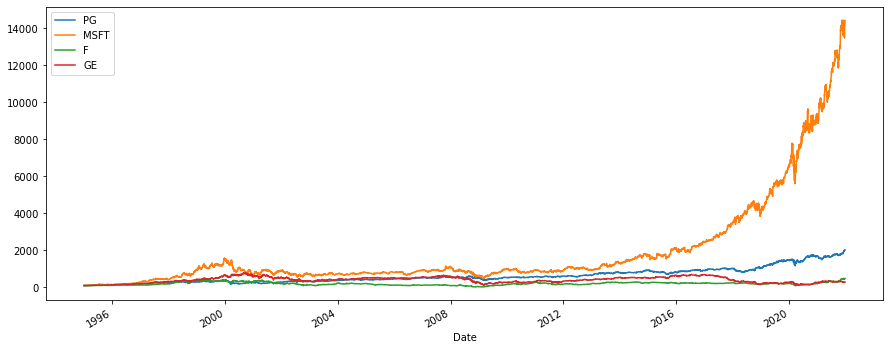

In [14]:
##(Pt/Po) * 100 normalizando para base 100 para ter um gráfico de linha
(mydata / mydata.iloc[0]*100).plot(figsize = (15,6))
plt.show()

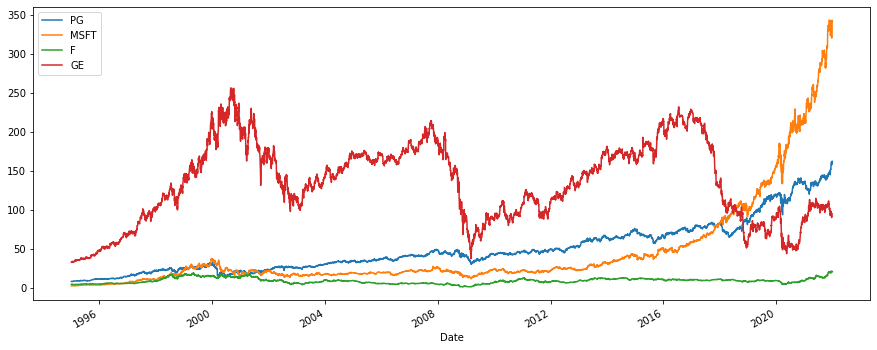

In [15]:
## se não normalizar para base 100 (na verdade é base 1) o gráfico fica ruim e sem ponto de referência
mydata.plot(figsize = (15,6))
plt.show()

In [17]:
##para usar o .loc utilizamos o rótulo referente a linha, enquanto pro iloc é a posição da linha
mydata.loc['1995-01-03']

PG       8.014158
MSFT     2.374855
F        4.358234
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

In [19]:
mydata.iloc[0]

PG       8.014158
MSFT     2.374855
F        4.358234
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

In [20]:
## agora calculando o retorno simples do portfólio

In [21]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [22]:
 ## colocando peso para as 4 ações por array/matriz
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [25]:
#np.dot calculo o produto de um vetor ou matriz, sendo o resultado um produto escalar
np.dot(returns, weights)

array([        nan,  0.00653969, -0.00922961, ...,  0.01377009,
        0.00620546,  0.01715552])

In [26]:
##calculando retorno médio para as 4 açoes
annual_returns = returns.mean() * 250
annual_returns

PG      0.135689
MSFT    0.231924
F       0.137284
GE      0.090211
dtype: float64

In [27]:
##estimando o produto delas
np.dot(annual_returns, weights)

0.14877678946956574

In [28]:
##arrendodamento e transformando em string
pfolio_1 = str(round(np.dot(annual_returns, weights),5)*100) + '%'
print(pfolio_1)

14.878%


In [30]:
##refazendo o processo com outros pesos
wieghts_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [32]:
pfolio_2 = str(round(np.dot(annual_returns, wieghts_2),5)*100) + '%'
print(pfolio_2)

17.215%
